In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import BeautifulSoup as soup
import json
import time

In [1]:
url = 'http://www.zillow.com/homes/recently_sold/Los-Angeles-CA/12447_rid/0-625000_price/0-2325_mp/34.087782,-118.175297,33.94749,-118.563595_rect/11_zm/'
#http://www.zillow.com/homes/recently_sold/Los-Angeles-CA/12447_rid/0-625000_price/0-2325_mp/34.078683,-118.219242,33.956318,-118.51965_rect/11_zm/2_p/


In [81]:
cache = {}

In [197]:
def xml2listing(articles):
    id = articles.get('id')
    statustype = articles.get('statustype')
    latitude = articles.get('latitude')
    longitude = articles.get('longitude')
    href = ''
    address = ''
    numphotos = ''
    bath = ''
    title = ''
    image = ''
    bed = ''
    label = ''
    datasize = ''
    sqft = ''
    id = ''
    statustype = ''
    for elem in articles:
        if str(type(elem)) == "<class 'BeautifulSoup.Tag'>":
            if elem.name == 'figure':
                a = elem.contents[0]
                if str(type(a)) == "<class 'BeautifulSoup.Tag'>":
                    href = a.get('href')
                    address = a.contents[0].get('alt')
                    if len(a.contents) > 1:
                        numphotos = a.contents[1].contents[0]
            elif elem.name == 'div':
                cls = elem.get('class')
                if cls == 'minibubble template hide':
                    jdata = elem.contents[0]
                    jdata = jdata.replace('\\\\/', '/').replace('\\', '')
                    j = json.loads(jdata)
                    bath = j['bath']
                    title = j['title']
                    image = j['image']
                    bed = j['bed']
                    label = j['label']
                    datasize = j['datasize']
                    sqft = j['sqft']
                elif cls == 'property-listing-data':
                    continue
                elif cls == 'terse-list-card-actions':
                    continue
                else:
                    continue
        else:
            continue
    listing = {}
    listing['id'] = id
    listing['statustype'] = statustype
    listing['latitude'] = latitude
    listing['longitude'] = longitude
    listing['href'] = href
    listing['address'] = address
    listing['numphotos'] = numphotos
    listing['bath'] = bath
    listing['title'] = title
    listing['image'] = image
    listing['bed'] = bed
    listing['label'] = label
    listing['datasize'] = datasize
    listing['sqft'] = sqft
    return listing

In [ ]:
TODO: sold on, sold price

In [204]:
p = 1
listings = []
while p < 25000:
    print p
    url2 = url
    if p > 1:
        url2 += '/' + str(p) + '_p'
    try:
        r = cache[url2]
    except KeyError:
        r = requests.get(url2)
        cache[url2] = r
        time.sleep(1)
    s = soup.BeautifulSoup(r.content)
    articles = s.find('article')
    if articles:
        listing = xml2listing(articles)
        print '.'
        listings.append(listing)
    p += 1

1
.
2
.
3
.
4
.
5
.
6
.
7
.
8
.
9
.
10
.
11
.
12
.
13
.
14
.
15
.
16
.
17
.
18
.
19
.
20
.
21
.
22
.
23
.
24
.
25
.
26
.
27
.
28
.
29
.
30
.
31
.
32
.
33
.
34
.
35
.
36
.
37
.
38
.
39
.
40
.
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70


KeyboardInterrupt: 

In [210]:
s = soup.BeautifulSoup(r.content)
articles = s.find('article')

In [211]:
xml2listing(articles)

AttributeError: 'NoneType' object has no attribute 'get'

In [201]:
df = pd.DataFrame(listings)

In [203]:
len(listings)

40

In [147]:
%matplotlib inline
import matplotlib.pyplot as plt
import requests
import xml.etree.ElementTree
import pandas as pd
import time

In [5]:
key = 'rfm7mtmnk4djwpk6df32wrwg'

In [149]:
zipcodes = ['90049', '90210', '90069', '90028', '90038', '90029', '90026', '90090', '90012', '90004', '90048', '90095', '90211', '90036', '90020', '90012', '90057', '90005', '90017', '90013', '90015', '90021', '90006', '90019', '90035', '90025', '90064', '90404', '90401', '90405', '90066', '90291', '90230', '90034', '90232', '90016', '90018', '90007', '90021', '90011', '90037', '90008', '90066', '90230', '90291', '90292', '90094', '90056', '90043', '90302', '90094', '90293', '90045', '90301', '90305', '90011', '90037', '90008', '90043', '90056', '90094', '90302', '90301', '90305']
zipcodes = list(set(zipcodes))

In [150]:
tStats = []
lStats = []
for zipcode in zipcodes:
    url = 'http://api.trulia.com/webservices.php?library=TruliaStats&function=getZipCodeStats&zipCode=' + zipcode + '&state=CA&startDate=2015-01-01&endDate=2016-01-11&apikey=' + key
    time.sleep(.5)
    r = requests.get(url)
    fname = 'data.xml'
    f = open(fname, 'w')
    f.write(r.text)
    f.close()
    e = xml.etree.ElementTree.parse(fname).getroot()
    stats = e.find('response').find('TruliaStats').find('trafficStats').findall('trafficStat')
    for stat in stats:
        row = [zipcode, stat.find('date').text, stat.find('percentStateTraffic').text, stat.find('percentNationalTraffic').text]
        tStats.append(row)
    listingStats = e.find('response').find('TruliaStats').find('listingStats').findall('listingStat')
    for listingStat in listingStats:
        week = listingStat.find('weekEndingDate').text
        subcategories = listingStat.find('listingPrice').findall('subcategory')
        row = {'week': week}
        for subcat in subcategories:
            t = subcat.find('type').text
            if t.find('Bedroom Properties') == 2:
                br = t[0:2].strip()
                num = subcat.find('numberOfProperties').text
                median = subcat.find('medianListingPrice').text
                mean = subcat.find('averageListingPrice').text
                row['num_' + br] = num
                row['median_' + br] = median
                row['mean_' + br] = mean
        lStats.append(row)
df1 = pd.DataFrame(tStats, columns=['zipcode', 'date', 'pStateTraffic', 'pNationalTraffic'])
df2 = pd.DataFrame(lStats)

In [145]:
df1.head()

,zipcode,date,pStateTraffic,pNationalTraffic
0,90024,2015-01-01,0.3435675707,0.0353114609
1,90024,2015-01-02,0.3958975198,0.0411695827
2,90024,2015-01-03,0.3599046739,0.0389503794
3,90024,2015-01-04,0.3708589128,0.0404831931
4,90024,2015-01-05,0.2528693773,0.0276436442


In [146]:
df2.head()

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_8,median_1,median_2,median_3,...,median_6,median_8,num_1,num_2,num_3,num_4,num_5,num_6,num_8,week
0,529389,1571835,3303602,3665592,3134107,NaN,2995000,549000,1013500,2881571,...,NaN,2995000,9,61,20,6,3,NaN,1,2015-01-03
1,531504,1550382,3275355,3794154,3134107,NaN,2995000,549000,989286,2429643,...,NaN,2995000,9,63,24,8,3,NaN,1,2015-01-10
2,545462,1566104,3275062,3748120,3561429,NaN,2995000,546271,986636,2703857,...,NaN,2995000,12,69,27,9,2,NaN,1,2015-01-17
3,552524,1556027,3242167,3845129,3872500,NaN,2995000,548000,987121,2851000,...,NaN,2995000,14,73,27,10,2,NaN,1,2015-01-24
4,529364,1567261,3206141,3800777,3885714,NaN,2995000,531671,984836,2846071,...,NaN,2995000,16,71,27,10,2,NaN,1,2015-01-31


In [151]:
print df1.shape, df2.shape

(14838, 4) (2726, 28)


In [153]:
import pickle
pickle.dump(df1, open('df1.pkl', 'wb'))
pickle.dump(df2, open('df2.pkl', 'wb'))

In [137]:
rows = []

listingStats = e.find('response').find('TruliaStats').find('listingStats').findall('listingStat')
for listingStat in listingStats:
    week = listingStat.find('weekEndingDate').text
    subcategories = listingStat.find('listingPrice').findall('subcategory')
    row = {'week': week}
    for subcat in subcategories:
        t = subcat.find('type').text
        if t.find('Bedroom Properties') == 2:
            br = t[0:2].strip()
            num = subcat.find('numberOfProperties').text
            median = subcat.find('medianListingPrice').text
            mean = subcat.find('averageListingPrice').text
            row['num_' + br] = num
            row['median_' + br] = median
            row['mean_' + br] = mean
    rows.append(row)

In [140]:
df = pd.DataFrame(rows)

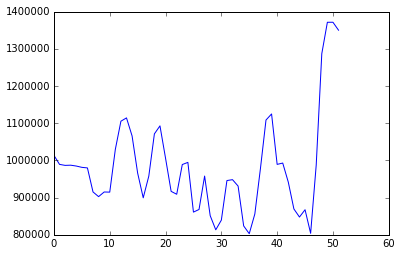

In [143]:
plt.plot(df['median_2'])

In [141]:
df.head()

,mean_1,mean_2,mean_3,mean_4,mean_5,mean_6,mean_8,median_1,median_2,median_3,...,median_6,median_8,num_1,num_2,num_3,num_4,num_5,num_6,num_8,week
0,529389,1571835,3303602,3665592,3134107,NaN,2995000,549000,1013500,2881571,...,NaN,2995000,9,61,20,6,3,NaN,1,2015-01-03
1,531504,1550382,3275355,3794154,3134107,NaN,2995000,549000,989286,2429643,...,NaN,2995000,9,63,24,8,3,NaN,1,2015-01-10
2,545462,1566104,3275062,3748120,3561429,NaN,2995000,546271,986636,2703857,...,NaN,2995000,12,69,27,9,2,NaN,1,2015-01-17
3,552524,1556027,3242167,3845129,3872500,NaN,2995000,548000,987121,2851000,...,NaN,2995000,14,73,27,10,2,NaN,1,2015-01-24
4,529364,1567261,3206141,3800777,3885714,NaN,2995000,531671,984836,2846071,...,NaN,2995000,16,71,27,10,2,NaN,1,2015-01-31
